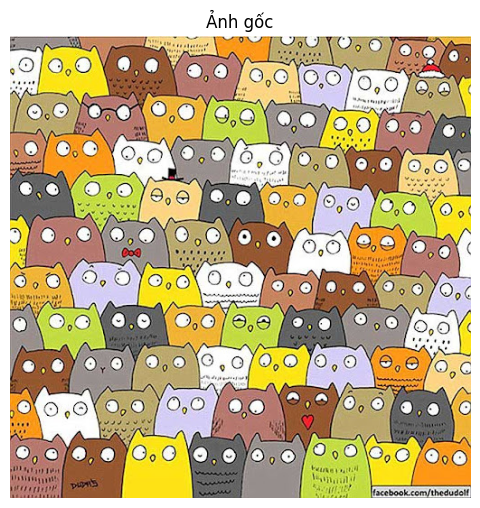

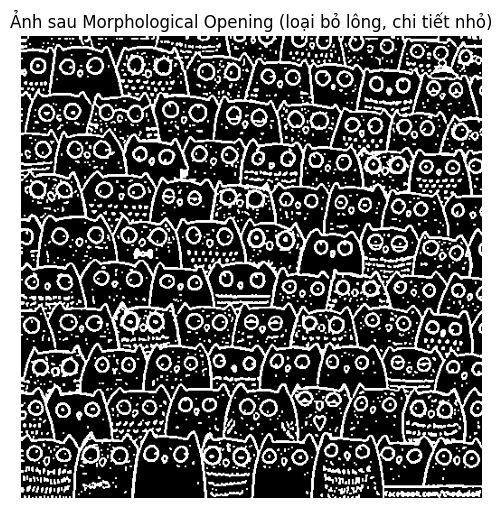

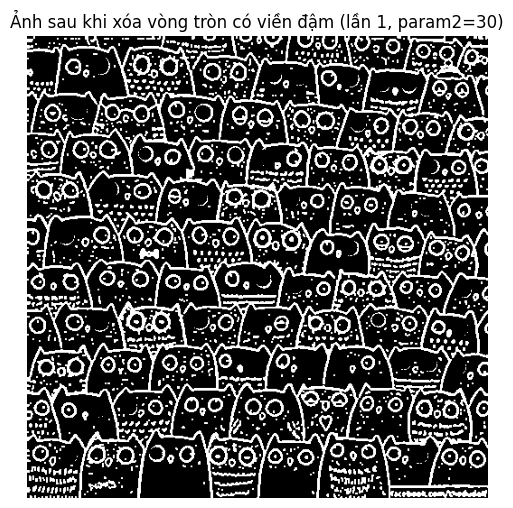

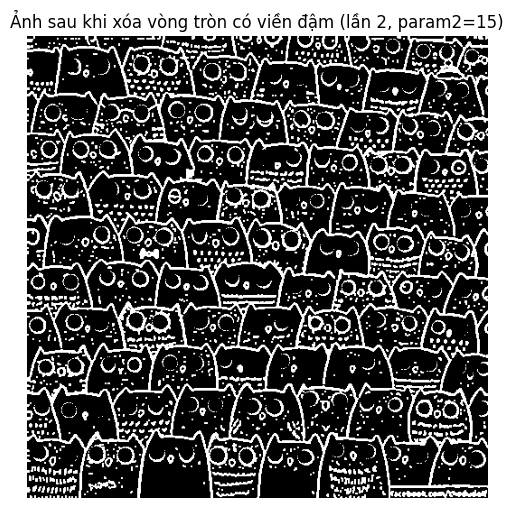

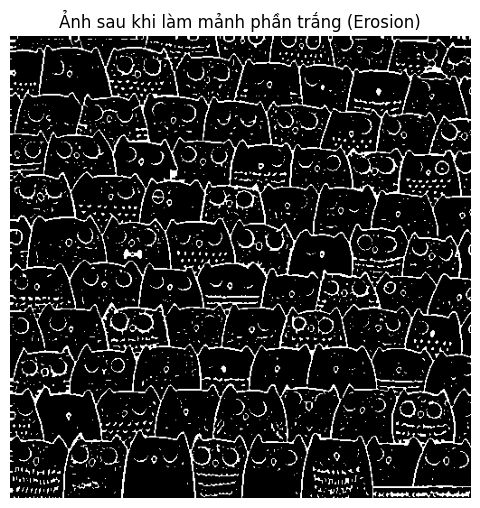

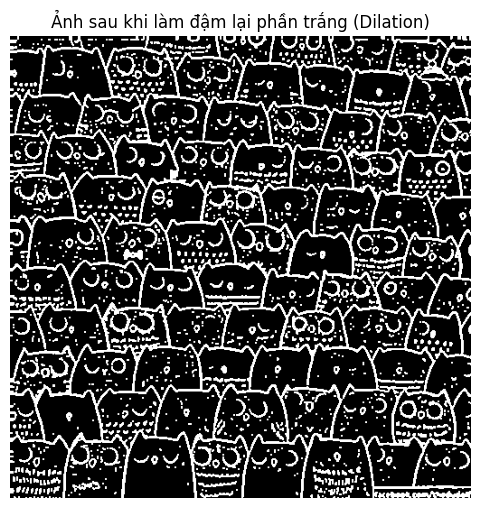

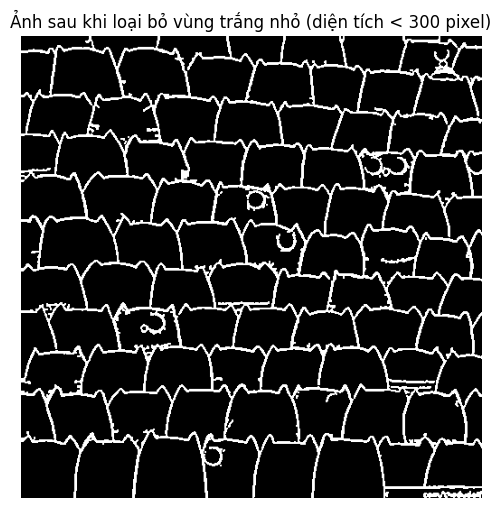

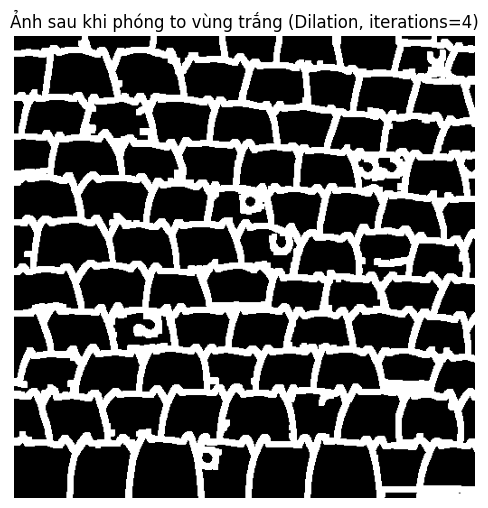

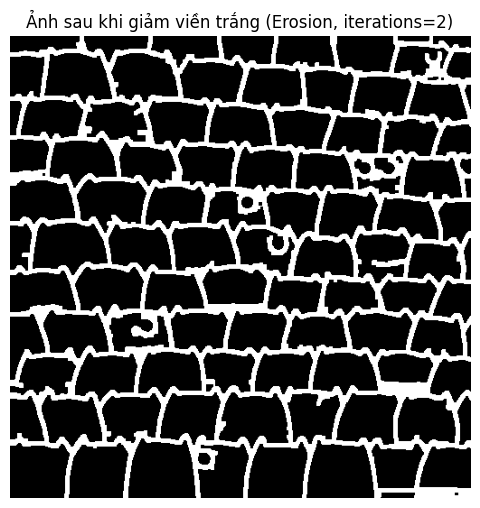


Số con mèo trong ảnh (dựa trên vùng đen > 600 pixel): 88


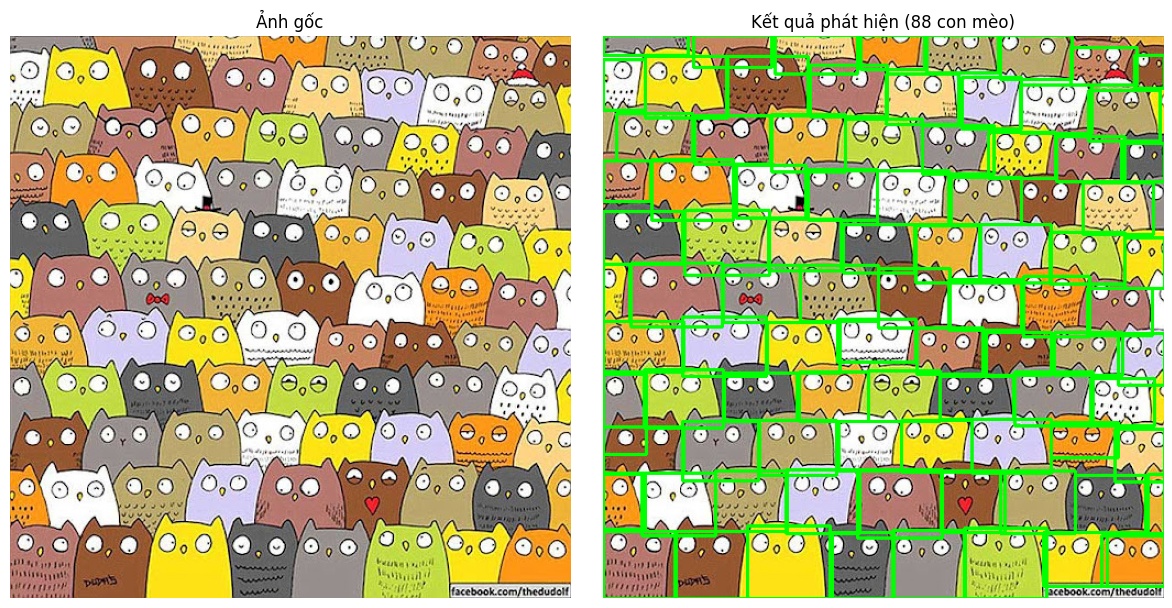


Thống kê diện tích các vùng đen (lỗ bên trong mèo):
Vùng đen 1: Diện tích = 1166
Vùng đen 2: Diện tích = 1148
Vùng đen 3: Diện tích = 1634
Vùng đen 4: Diện tích = 1509
Vùng đen 5: Diện tích = 1923
Vùng đen 6: Diện tích = 2300
Vùng đen 9: Diện tích = 1239
Vùng đen 10: Diện tích = 3091
Vùng đen 11: Diện tích = 2971
Vùng đen 12: Diện tích = 669
Vùng đen 13: Diện tích = 1528
Vùng đen 14: Diện tích = 2604
Vùng đen 15: Diện tích = 2445
Vùng đen 16: Diện tích = 2035
Vùng đen 17: Diện tích = 2288
Vùng đen 20: Diện tích = 2082
Vùng đen 22: Diện tích = 2376
Vùng đen 24: Diện tích = 2216
Vùng đen 25: Diện tích = 2675
Vùng đen 26: Diện tích = 2554
Vùng đen 27: Diện tích = 2267
Vùng đen 28: Diện tích = 2014
Vùng đen 29: Diện tích = 1985
Vùng đen 30: Diện tích = 1053
Vùng đen 31: Diện tích = 2726
Vùng đen 32: Diện tích = 1409
Vùng đen 33: Diện tích = 2047
Vùng đen 34: Diện tích = 2353
Vùng đen 35: Diện tích = 2458
Vùng đen 36: Diện tích = 2205
Vùng đen 39: Diện tích = 2349
Vùng đen 44: Diện tích = 

In [ ]:
# Import các thư viện cần thiết
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Đọc ảnh
image_path = 'cat.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn.")
    raise SystemExit

# Chuyển ảnh sang định dạng RGB để hiển thị bằng matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.title("Ảnh gốc")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Bước 1: Chuyển ảnh sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Bước 2: Tăng độ tương phản bằng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(gray)

# Bước 3: Làm mờ ảnh bằng Gaussian Blur để giảm nhiễu
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Bước 4: Áp dụng adaptive thresholding để tạo ảnh nhị phân
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Bước 5: Loại bỏ lông và chi tiết nhỏ bằng Morphological Opening
kernel = np.ones((2, 2), np.uint8)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

# Hiển thị ảnh sau khi loại bỏ lông và chi tiết nhỏ
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau Morphological Opening (loại bỏ lông, chi tiết nhỏ)")
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.show()

# Bước 6: Xóa các vòng tròn có viền đậm (mắt mèo nổi bật)
circle_removed = opened.copy()

# Lần 1: Phát hiện các vòng tròn có viền rất đậm (param2 cao)
circles_strong = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=5,
                                  param1=50, param2=30, minRadius=5, maxRadius=10)
if circles_strong is not None:
    circles_strong = np.uint16(np.around(circles_strong[0]))
    for x, y, r in circles_strong:
        r_adjusted = int(r * 1.2) 
        cv2.circle(circle_removed, (x, y), r_adjusted, 0, -1) 

# Hiển thị ảnh sau khi xóa các vòng tròn có viền đậm (lần 1)
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi xóa vòng tròn có viền đậm (lần 1, param2=30)")
plt.imshow(circle_removed, cmap='gray')
plt.axis('off')
plt.show()

# Lần 2: Phát hiện các vòng tròn có viền đậm vừa phải (param2 thấp hơn)
circles_medium = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=5,
                                  param1=50, param2=15, minRadius=3, maxRadius=8)
if circles_medium is not None:
    circles_medium = np.uint16(np.around(circles_medium[0]))
    for x, y, r in circles_medium:
        r_adjusted = int(r * 1.2) 
        cv2.circle(circle_removed, (x, y), r_adjusted, 0, -1) 

# Hiển thị ảnh sau khi xóa các vòng tròn có viền đậm (lần 2)
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi xóa vòng tròn có viền đậm (lần 2, param2=15)")
plt.imshow(circle_removed, cmap='gray')
plt.axis('off')
plt.show()

# Bước 7: Làm mảnh phần trắng bằng Erosion
thinned_white = cv2.erode(circle_removed, kernel, iterations=1)

# Hiển thị ảnh sau khi làm mảnh phần trắng
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi làm mảnh phần trắng (Erosion)")
plt.imshow(thinned_white, cmap='gray')
plt.axis('off')
plt.show()

# Bước 8: Làm đậm lại phần trắng bằng Dilation
bold_white = cv2.dilate(thinned_white, kernel, iterations=1)

# Hiển thị ảnh sau khi làm đậm lại phần trắng
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi làm đậm lại phần trắng (Dilation)")
plt.imshow(bold_white, cmap='gray')
plt.axis('off')
plt.show()

# Bước 9: Loại bỏ các phần trắng liền nhau có diện tích dưới 300 pixel
# Tìm các thành phần liên thông (vùng trắng)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bold_white, connectivity=8)

# Tạo một ảnh mới để lưu kết quả sau khi xóa các vùng trắng nhỏ
filtered_white = np.zeros_like(bold_white)
for i in range(1, num_labels): 
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= 300:
        filtered_white[labels == i] = 255

# Hiển thị ảnh sau khi loại bỏ các vùng trắng nhỏ
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi loại bỏ vùng trắng nhỏ (diện tích < 300 pixel)")
plt.imshow(filtered_white, cmap='gray')
plt.axis('off')
plt.show()

# Bước 10: Phóng to vùng trắng bằng Dilation để các vùng liền nhau hơn
dilated = cv2.dilate(filtered_white, kernel, iterations=4)

# Hiển thị ảnh sau khi phóng to vùng trắng
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi phóng to vùng trắng (Dilation, iterations=4)")
plt.imshow(dilated, cmap='gray')
plt.axis('off')
plt.show()

# Bước 11: Giảm viền trắng bằng Erosion (2 lần) trước khi đếm
eroded_final = cv2.erode(dilated, kernel, iterations=2)

# Hiển thị ảnh sau khi giảm viền trắng
plt.figure(figsize=(6, 6))
plt.title("Ảnh sau khi giảm viền trắng (Erosion, iterations=2)")
plt.imshow(eroded_final, cmap='gray')
plt.axis('off')
plt.show()

# Bước 12: Đếm số phần đen có diện tích liền nhau trên 600 pixel (coi đó là mèo)
# Đảo ngược ảnh để vùng đen trở thành vùng trắng (foreground) và vùng trắng trở thành vùng đen (background)
inverted = cv2.bitwise_not(eroded_final)

# Tìm các thành phần liên thông (vùng đen trong ảnh gốc, giờ là vùng trắng trong ảnh đảo ngược)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(inverted, connectivity=8)

# Đếm số vùng đen có diện tích trên 600 pixel
filtered_cats = 0
output_image = image_rgb.copy()
for i in range(1, num_labels): 
    x, y, w, h, area = stats[i]
    if area > 600:  
        filtered_cats += 1
        cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# In kết quả
print(f"\nSố con mèo trong ảnh (dựa trên vùng đen > 600 pixel): {filtered_cats}")

# Hiển thị ảnh gốc và ảnh kết quả
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Ảnh gốc")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Kết quả phát hiện ({filtered_cats} con mèo)")
plt.imshow(output_image)
plt.axis('off')

plt.tight_layout()
plt.show()

# In thống kê diện tích các vùng đen để kiểm tra
print("\nThống kê diện tích các vùng đen (lỗ bên trong mèo):")
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 600: 
        print(f"Vùng đen {i}: Diện tích = {area}")